In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
y = y.reshape(-1, 1)
X.shape, y.shape

((1000, 2), (1000, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# model with linear activation
def build_linear_model():
  model = Sequential([
      Dense(4, activation='linear', input_dim=2),
      Dense(1, activation='sigmoid')
  ])
  model.compile(optimizer = Adam(learning_rate=0.01), loss = 'binary_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
# model with relu function
def build_relu_model():
  model = Sequential([
      Dense(4, activation='relu', input_dim=2),
      Dense(1, activation='sigmoid')
  ])
  model.compile(optimizer = Adam(learning_rate=0.01), loss = 'binary_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test, epochs=50, batch_size=32):
  model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
  y_pred = (model.predict(X_test) > 0.5).astype(int)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy, y_pred

In [ ]:
linear_model = build_linear_model()
relu_model = build_relu_model()

print("Training linear model...")
linear_accuracy, linear_preds = train_and_evaluate(linear_model, X_train, y_train, X_test, y_test)
print(f"Accuracy with linear activation: {linear_accuracy:.2f}")

print("Training ReLU model...")
relu_accuracy, relu_preds = train_and_evaluate(relu_model, X_train, y_train, X_test, y_test)
print(f"Accuracy with ReLU activation: {relu_accuracy:.2f}")

Training linear model...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Accuracy with linear activation: 0.85
Training ReLU model...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Accuracy with ReLU activation: 0.97


In [ ]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = (Z > 0.5).astype(int).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), edgecolor="k")
    plt.title(title)
    plt.show()


Visualizing decision boundaries...
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


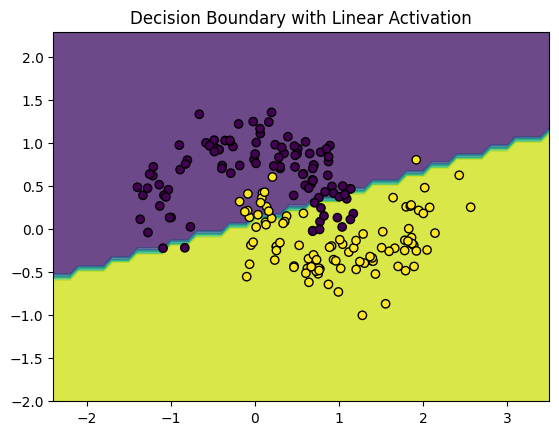

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


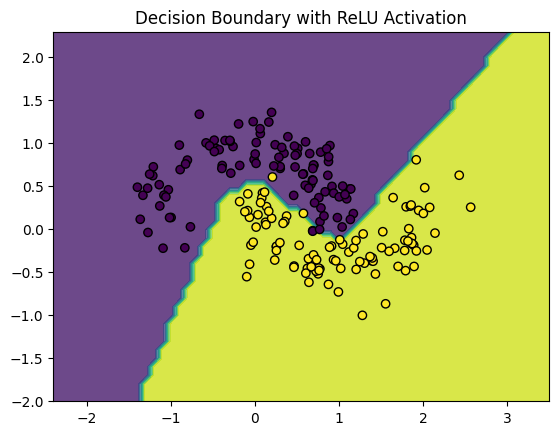

In [ ]:
# Plot decision boundaries
print("\nVisualizing decision boundaries...")
plot_decision_boundary(linear_model, X_test, y_test, "Decision Boundary with Linear Activation")
plot_decision_boundary(relu_model, X_test, y_test, "Decision Boundary with ReLU Activation")